# Trees...

>
![alt text](https://drive.google.com/uc?id=1Xvm8HeymRaVlqs_1qdy7eBlvsS_7FDoY)

#### Skewness of data
* How to find a model that can deal with the skewness of the data??
* Trees are great for sparse data like we have!



#### TREES ARE CRAP AT PREDICTING TRENDS? WHY ? 
*They only model based on the data and nothing more! Thus, when they go to predict 
future values they only created trees based on based values? How to get around this?*


1.   take log or difference of data BEFORE modelling and then reverse before accuracy. Thus, your models is not predicting trend or seasonality
2.   find NON-time based models! things like holiday or weather something that are big indicators NOT based on time.


#### What is Gradient Boosting?

It is a boosting algorithm in which the loss is minimised using Gradient Descent method

#### What is XGBoost?

XGBoost is a regularised boosting model and hence reduces overfitting when compared to other boosting algorithms. It also implements parallel processing and is faster compared to other boosting algorithms

Now that we have a basic understanding about Gradient Boosting Models and XGBoost, let's move on to LightGBM.

#### What is LightGBM? Why did I use LGBM instead of other boosting algorithms(Ex: XGBoost)?

Light GBM is a fast, distributed, high-performance gradient boosting framework. Unlike other boosting algorithms it splits the trees leafwise and not level wise. LGBM runs very fast, hence the word 'light'. It trains faster(on larger datasets) compared to other boosting algorithms like XGBoost. It uses leaf wise splitting instead of level wise splitting. Leaf wise splitting may lead to overfitting. This can be avoided by specifying tree-specific hyper parameters like max depth. In my case, I have used num_leaves hyper-parameter to avoid overfitting.

Before moving on to discussing about hyper-parameters in LightGBM, let's discuss about different types of parameters in a boosting model..

#### What are the parameters in a boosting model?

Generally boosting algorithms consists of large number of hyperparameters that are to be tuned to perform better than baseline model. These parameters may tune the trees in the model(Ex: min_samples_leaf) or are specific to boosting(Ex: learning rate).

Above, we have discussed about the types of parameters in a model. Let's move on to parameters specific to LightGBM

#### Hyper-parameters to tune in LGBM:

##### For best fit and better accuracy:

1. num_leaves: Number of leaves to form a complete tree. Either this or max_depth can be set. As setting max_depth leads to limiting the number of leaf nodes in tree which equals to 2^max_depth. One can either set this or max_depth to avoid overfitting. Setting both of the hyper parameters may result in dampening one of them and underfitting the tree.

2. min_data_in_leaf: Minimum number of samples required in a leaf node. Too low a value results in overfitting whereas a very high value may result in underfitting. This value results on size of underlying dataset and needs to be carefully tuned 

##### For faster speed:

1. Bagging_fraction: Fraction of data to be used in each iteration. Default is 1. Can use a smaller value(Typically ranging from 0.8 to 1.0) to improve the speed of model and reduce overfitting.

2. Feature_fraction: Fraction of features to be used in each iteration. Default is 1 i.e all features are used. Similar to bagging_fraction, we can use a smaller value to improve the speed of training. Typical values are between 0.8 and 1.0

##### Other useful tuning hyper_parameters:

1. learning_rate: learning rate of boosting algorithm. Default is 0.1. Typical values are from 0.01 to 0.2 and may extend upto 0.3. Higher the learning rate, faster the algorithm runs. Lower learning rates help the algorithm in generalising well but take a lot more training time.

2. n_estimators: Number of trees to fit. I haven't found many resources on how this parameter behaves with respect to LGBM but what I have observed it is generally results in a higher score. It also generalises the model better with more trees. Training time is directly proportial to number of trees initially and then tends to increase more than linear as it gets harder and harder to increase the accuracy of models. 

>>(Extra information: If we dig into lgbm code(https://github.com/Microsoft/LightGBM/blob/master/python-package/lightgbm/engine.py) and sklearn code for lgbm(https://github.com/Microsoft/LightGBM/blob/e5eb8560af16ec502179e436a4e78749d1c54b0a/python-package/lightgbm/sklearn.py) we can see that n_estimators is same as num_boost_round which is equivalent to any on of these "num_iterations", "num_iteration", "num_tree", "num_trees", "num_round", "num_rounds".)

3. max_bin: maximum number of buckets used. Higher values results in better accuracy whereas lower value results in faster computation. 

4. Other parameters such as objective, metric and boosting are specific to each data set. In our case, metric is going to be auc.

* 'Objective': 'binary' refers to binary classification, 'Boosting': 'gbdt'(Gradient Boosted Decision Trees) refers to the boosting type we are using, 'Verbose' refers to the level of details we want to be printed and 'metric': auc refers to our evaluation metric on our validation set.

*Please note that, I am using 500 rounds and as such, this will take anywhere from 30 minutes to 2 hours(approximately) to run depending on your system.*

# Implementation Notes


*   weekly sql for one years of past data from that timeframe
*   weekly forecast? how to do every sunday and thursday?



#Shifted Target Features

* Another source of feature information is what I would call shifted target information or lagged features; that is we can look a recent, or relevant, observation of the thing we are trying to predict, and use this as a feature in the model.

* The important principle is that your model data must not contain information that would not be available at the time of prediction so a one day shift is only available one day before. So your model is only predicting one day ahead. If you wanted to forecast calls for the entire year upfront, you would not have access to the one day shifted information, and so you would need to make appropriate modifications to the shift i.e. 365 day shift.

* In the introduction we formulated the business problem as trying to predict seven days ahead so I have only included shifted targets that would be available 7 days before.

* We will also examine the impact on model performance of leaving these features out of the model, as leaving out the shifted variables will make the model’s use less restricted.

#LGBM EXAMPLES BELOW

EXCELLENT EXAMPLE: https://www.jpytr.com/post/time-series-with-gradient-boosted-models/

# Setups/ Imports

In [0]:
#Colab stuffs:

#get a fast operator system
!nvidia-smi

#mount google drive
from google.colab import drive
drive.mount('/content/drive')#click on the link it provides and copy and paste that code into the authorization area

#access the OS system to work with current directories:
import os

Mon Nov  4 16:38:23 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#Imports

import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

from math import sqrt
import statsmodels.api as sm
from sklearn import metrics
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.despine()
sns.set(rc={'figure.figsize':(15,9)})
%matplotlib inline

In [0]:
#import and clean DF
df = pd.read_csv('drive/My Drive/Capstone_2/data/100_items.csv', index_col= 'invdate', low_memory=False)#100 highest revenue items to test models

#creating a data frame with just the normalized quantities ordered.
dfqty = pd.pivot_table(df, values= "norm_qty", index= "invdate", columns = "item", aggfunc=np.sum, fill_value=0)

# #Adding total columns--- dont think I want to add this...
# dfqty["day_total"]= dfqty.sum(axis = 1, skipna = True)

#resetting index to datetime
dfqty.index = pd.to_datetime(dfqty.index)

#filling in the missing days
idx = pd.date_range('2018-08-23', '2019-08-23')
dfqty = dfqty.reindex(idx, fill_value=0)

#Whoops accidentally did 366 days instead of 365! Let's fix that...
dfqty = dfqty[1:]

print (dfqty.shape)
dfqty.head()

(365, 100)


item,10218B,10219,10221,10230,10236,10238,10241,10245,10289,10330J,10331,10332,10334,10339,10346,10370,10513,20011,20040,20050,20081,20088,20096,20125,20187,20190,20213,20213B,20215A,20221C,20227,20231,20234C,20300,20302A,20318,20318B,20328A,20329,20345,...,30188,30208,30210,30234-A,30239,30298A,30323,30349,30377,30385,30449,30457,30492,30492A,30541,30588,30683,30694,30762,40009E,40037G,40042,40051,40071,40088,50092,50112,50125,50139,60013,60013B,60015A,60023,60029,60037,70046C,70114A,90107,CV70191W,CV70192
2018-08-24,8.5,13.7,0.0,5.00,0.0,26.0,7.0,1.0,3,6.0,0.0,4.0,0.0,1.000000,5.526316,0.0,14.0,0.0,4.0,1.0,0.0,1.5,5.0,2.0,4.0,0.0,11.0,13,20,20,14.0,0,0.0,1.75,0.0,4.333333,4.000000,0.0,9.0,3.900000,...,0.0,1.00,0.0,5.00,3.0,8.00,1.0,2.5000,1.0,0.0,4.00,1.50,3.5,6.0,5.0,0.0,0.0,0.05,1.0,0.0,0.0,0.0,0.0,16.5,1.0,0.0,0.0,3.0,0.0,3,11.0,11.0,4.0,26.0,12.0,13.0,198,1,1.0,1.000
2018-08-25,0.0,1.0,0.0,3.25,1.0,31.0,42.0,0.0,3,0.0,0.0,2.0,0.0,2.263158,2.763158,0.0,1.0,0.0,0.5,0.0,0.0,1.0,2.0,0.0,3.0,0.0,1.0,8,20,16,4.0,0,0.0,0.50,0.0,3.000000,0.066667,0.0,4.0,1.533333,...,0.0,1.75,0.2,2.00,0.0,0.00,0.5,1.0000,1.0,0.0,4.25,0.25,4.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,3.0,0.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,0,2.0,1.0,1.0,3.0,8.0,0.0,14,2,1.0,6.375
2018-08-26,0.0,0.0,0.0,4.00,8.0,0.0,4.0,0.0,0,0.0,0.0,2.0,0.0,0.000000,1.000000,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1.0,1,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.00,0.0,2.00,0.0,1.00,0.0,0.0000,0.0,0.0,1.00,1.00,1.0,2.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,1.0,0.0,0.0,3.0,0.0,0,0,0.0,0.000
2018-08-27,3.0,14.0,0.0,4.50,14.0,15.0,14.0,6.0,3,0.0,0.0,3.0,0.0,1.263158,3.789474,0.0,4.0,6.0,3.5,20.5,0.0,1.0,5.5,1.0,4.0,0.5,24.0,7,22,23,12.0,13,0.0,1.75,0.0,5.166667,4.333333,0.0,17.0,6.466667,...,0.0,1.50,2.0,7.25,0.0,6.25,2.0,1.0625,3.0,0.0,16.00,4.00,7.0,5.0,0.8,0.0,1.0,1.00,5.5,3.0,7.0,2.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,11,5.0,6.0,3.0,5.0,9.0,12.0,49,2,2.0,1.625
2018-08-28,3.5,3.6,0.0,5.00,0.0,21.0,13.0,2.0,2,0.0,0.0,0.0,0.0,1.263158,3.526316,0.0,15.0,2.0,4.5,1.0,1.5,2.0,0.0,0.0,6.0,2.0,8.0,18,23,26,12.0,12,0.0,1.50,0.0,2.166667,6.000000,0.0,14.0,5.800000,...,0.0,2.00,5.7,7.00,0.0,3.00,1.0,5.0625,3.0,0.0,5.00,5.00,5.5,2.0,1.5,0.0,32.0,2.50,3.0,2.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,4.0,0.5,5,3.0,4.0,3.0,3.0,3.0,1.0,102,3,0.0,0.000


In [0]:
#melting the training data

dfqty.reset_index(inplace= True) #reset index for melt
melt = dfqty.melt(id_vars='index', var_name='item', value_name='sales')
melt = melt.sort_values(['index', 'item'])
dfqty.set_index('index', inplace= True) #put index back
print (f'Number of Rows in the melted dataframe: {melt.shape}')
num_rows= melt.shape[0]
print (melt.head())

Number of Rows in the melted dataframe: (36500, 3)
          index    item  sales
0    2018-08-24  10218B    8.5
365  2018-08-24   10219   13.7
730  2018-08-24   10221    0.0
1095 2018-08-24   10230    5.0
1460 2018-08-24   10236    0.0


*Bueno! We have 33,400 rows to work with!*

# Feature Engineering

We need to create lots of feature for the trees to sort with. After we run a couple test cases, we can also trim these down once we figure out which ones do not beneift the model. We will add the following:

* Date features like day number, week number month number, ect.
>* Day number of the week (0-6, where 0 = Monday, 6 =Sunday)
* Lag and differences of the current weeks demand (usually very correlated, and generally the more the merrier)
>* I will be taking the lags and differences in 7 day increments. Why? Because I want to model weekly demand, not daily. 
* Holiday Features
>* As discussed with the client that pertains to their type of business


In [0]:
#Basic Feature engineering- Dates
melt2 = melt.copy()

melt2['date']= pd.to_datetime(melt2['index']) #converting index to a datetime
melt2.drop(columns= ['index'], inplace= True)


# Extracting date features
melt2['dayofmonth'] = melt2.date.dt.day
melt2['dayofyear'] = melt2.date.dt.dayofyear
melt2['dayofweek'] = melt2.date.dt.dayofweek
melt2['month'] = melt2.date.dt.month
melt2['year'] = melt2.date.dt.year
melt2['weekofyear'] = melt2.date.dt.weekofyear
melt2['is_month_start'] = (melt2.date.dt.is_month_start).astype(int)
melt2['is_month_end'] = (melt2.date.dt.is_month_end).astype(int)
melt2.head()

,item,sales,date,dayofmonth,dayofyear,dayofweek,month,year,weekofyear,is_month_start,is_month_end
0,10218B,8.5,2018-08-24,24,236,4,8,2018,34,0,0
365,10219,13.7,2018-08-24,24,236,4,8,2018,34,0,0
730,10221,0.0,2018-08-24,24,236,4,8,2018,34,0,0
1095,10230,5.0,2018-08-24,24,236,4,8,2018,34,0,0
1460,10236,0.0,2018-08-24,24,236,4,8,2018,34,0,0


In [0]:
#Basic Feature Engineering- lags, differences, and logs-- These tend to help ALOT with time series data

melt2['last_wk_sales'] = melt2.groupby(['item'])['sales'].shift(7)
melt2['last_wk_diff'] = melt2.groupby(['item'])['sales'].diff(7)
melt2['log_sales'] = np.log1p(melt2.sales.values)# Converting sales to log(1+sales)
melt2['2wks_sales'] = melt2.groupby(['item'])['sales'].shift(14)
melt2['2wks_diff'] = melt2.groupby(['item'])['sales'].diff(14)
melt2['3wks_sales'] = melt2.groupby(['item'])['sales'].shift(21)
melt2['3wks_diff'] = melt2.groupby(['item'])['sales'].diff(21)
melt2['4wks_sales'] = melt2.groupby(['item'])['sales'].shift(28)
melt2['4wks_diff'] = melt2.groupby(['item'])['sales'].diff(28)
melt2['5wks_sales'] = melt2.groupby(['item'])['sales'].shift(35)
melt2['5wks_diff'] = melt2.groupby(['item'])['sales'].diff(35)
melt2['6wks_sales'] = melt2.groupby(['item'])['sales'].shift(42)
melt2['6wks_diff'] = melt2.groupby(['item'])['sales'].diff(42)
melt2['7wks_sales'] = melt2.groupby(['item'])['sales'].shift(49)
melt2['7wks_diff'] = melt2.groupby(['item'])['sales'].diff(49)
melt2['8wks_sales'] = melt2.groupby(['item'])['sales'].shift(56)
melt2['8wks_diff'] = melt2.groupby(['item'])['sales'].diff(56)
melt2 = melt2.dropna()

print (f'Number of Rows lost by differencing: {num_rows-melt2.shape[0]}') #how many rows did we loose from the differencing?
melt2.head()

Number of Rows lost by differencing: 5600


,item,sales,date,dayofmonth,dayofyear,dayofweek,month,year,weekofyear,is_month_start,is_month_end,last_wk_sales,last_wk_diff,log_sales,2wks_sales,2wks_diff,3wks_sales,3wks_diff,4wks_sales,4wks_diff,5wks_sales,5wks_diff,6wks_sales,6wks_diff,7wks_sales,7wks_diff,8wks_sales,8wks_diff
56,10218B,0.0,2018-10-19,19,292,4,10,2018,42,0,0,0.00,0.00,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5,-4.5,8.5,-8.5
421,10219,7.0,2018-10-19,19,292,4,10,2018,42,0,0,10.50,-3.50,2.079442,9.5,-2.5,13.00,-6.00,7.0,0.0,6.5,0.5,20.0,-13.0,6.0,1.0,13.7,-6.7
786,10221,0.0,2018-10-19,19,292,4,10,2018,42,0,0,1.00,-1.00,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,10230,8.0,2018-10-19,19,292,4,10,2018,42,0,0,4.25,3.75,2.197225,14.0,-6.0,6.25,1.75,10.0,-2.0,6.0,2.0,10.0,-2.0,9.0,-1.0,5.0,3.0
1516,10236,2.0,2018-10-19,19,292,4,10,2018,42,0,0,7.00,-5.00,1.098612,3.0,-1.0,2.00,0.00,3.0,-1.0,4.0,-2.0,0.0,2.0,1.0,1.0,0.0,2.0


In [0]:
#converting date to index datetime
melt2.date = pd.to_datetime(melt2.date)
melt2.set_index('date', inplace= True)

In [0]:
#Adding Holidays--- these were events discussed with the customer

#adding holidays--- just create a column with a bunch of True and Falses for each holiday
melt2["new_years"] = melt2.index.dayofyear == 1
melt2["christmas"] = (melt2.index.month == 12) & ((melt2.index.day >= 18)&(melt2.index.day <= 26))
melt2["thanksgiving"] = (melt2.index.month == 11) & ((melt2.index.day >= 22)&(melt2.index.day <= 27))
melt2["farm2table"] = (melt2.index.month == 7) & ((melt2.index.day >= 1)&(melt2.index.day <= 15))
melt2["memorial_day"] = (melt2.index.month == 5) & ((melt2.index.day >= 18)&(melt2.index.day <= 28))
melt2["back_to_school"] = (melt2.index.month == 9) & (melt2.index.day == 1)
melt2.loc['2018-12-26'] #double checking


,item,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear,is_month_start,is_month_end,last_wk_sales,last_wk_diff,log_sales,2wks_sales,2wks_diff,3wks_sales,3wks_diff,4wks_sales,4wks_diff,5wks_sales,5wks_diff,6wks_sales,6wks_diff,7wks_sales,7wks_diff,8wks_sales,8wks_diff,new_years,christmas,thanksgiving,farm2table,memorial_day,back_to_school
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-26,10218B,0.0,26,360,2,12,2018,52,0,0,2.0,-2.0,0.000000,4.0,-4.0,1.0,-1.0,4.50,-4.50,0.5,-0.5,3.50,-3.50,5.5,-5.5,0.00,0.00,False,True,False,False,False,False
2018-12-26,10219,1.0,26,360,2,12,2018,52,0,0,1.0,0.0,0.693147,3.0,-2.0,5.0,-4.0,2.00,-1.00,6.5,-5.5,3.00,-2.00,5.0,-4.0,2.00,-1.00,False,True,False,False,False,False
2018-12-26,10221,0.0,26,360,2,12,2018,52,0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,3.50,-3.50,False,True,False,False,False,False
2018-12-26,10230,0.0,26,360,2,12,2018,52,0,0,0.0,0.0,0.000000,1.0,-1.0,2.0,-2.0,3.25,-3.25,1.0,-1.0,4.25,-4.25,5.0,-5.0,7.75,-7.75,False,True,False,False,False,False
2018-12-26,10236,0.0,26,360,2,12,2018,52,0,0,0.0,0.0,0.000000,1.0,-1.0,0.5,-0.5,0.00,0.00,6.0,-6.0,0.00,0.00,2.0,-2.0,0.00,0.00,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,70046C,0.0,26,360,2,12,2018,52,0,0,20.0,-20.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,5.00,-5.00,False,True,False,False,False,False
2018-12-26,70114A,88.0,26,360,2,12,2018,52,0,0,10.0,78.0,4.488636,0.0,88.0,0.0,88.0,0.00,88.00,0.0,88.0,0.00,88.00,0.0,88.0,0.00,88.00,False,True,False,False,False,False
2018-12-26,90107,0.0,26,360,2,12,2018,52,0,0,0.0,0.0,0.000000,1.0,-1.0,2.0,-2.0,3.00,-3.00,0.0,0.0,2.00,-2.00,0.0,0.0,0.00,0.00,False,True,False,False,False,False


In [0]:
most_recent_day= melt2.index.max() #last date in the DF
most_recent_day = pd.to_datetime(most_recent_day, unit= 'D')
print(f'most recent day = {most_recent_day}')

eight_weeks= most_recent_day - pd.Timedelta(days=55) # 8 weeks or 55 (with indexing) days from today
eight_weeks= str(eight_weeks) #turn into a string for indexing purposes
print(f'most recent day = {eight_weeks}')

#extracting the last 8 weeks of data from the current DF
df2 = melt2.loc[eight_weeks :]
df2.sort_index(inplace= True)

most recent day = 2019-08-23 00:00:00
most recent day = 2019-06-29 00:00:00


Text(0.5, 1, 'Correlation Matrix od the different features')

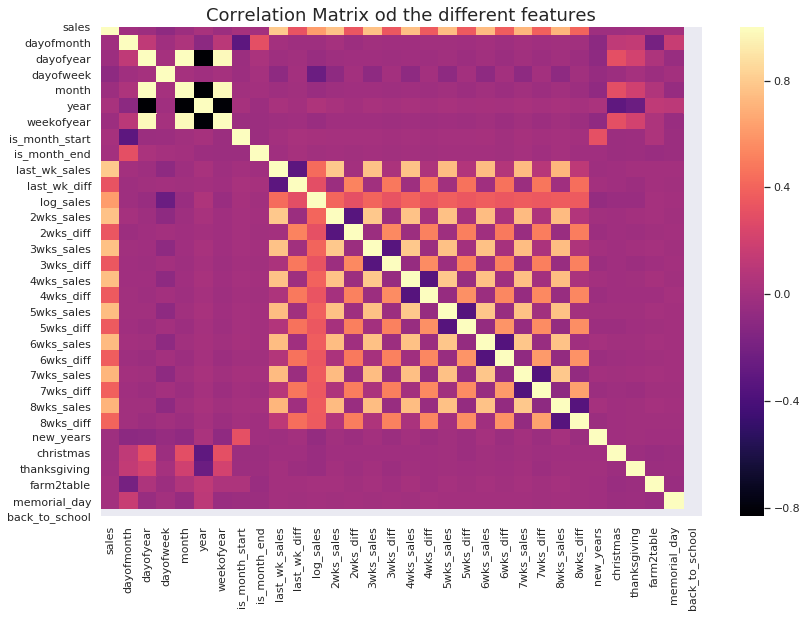

In [0]:
#I'm curious... how correlated are these variables to the actual sales?

# calculate the correlation matrix
corr = melt2.corr()

# plot the heatmap
plt.figure(figsize=(12,9))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='magma')

plt.title("Correlation Matrix od the different features", fontsize= 18)

#### INSIGHTS


*   Anything close to pink is not great correlation. Anything on the lighter or darker side is a good correlation with white being the best positive correlation and black being the best negative correlation.
* Looks like there is a fair amount of correlation between past sales. 
*   Not a lot of correlation with the other variables
* Day number of the week and week number of the year have a sliiiiiight correlation. This makes sense because our EDA was showing some weekly trends.



# Re-establishing a Baseline and Train/Validation Set

In [0]:
#rmse metric function
def rmse(ytrue, ypred):
  return (round(sqrt(mean_squared_error(ytrue, ypred)), 3))

#getting the last week of this subset of data
last_week = melt2['weekofyear'].iloc[-1] 

In [0]:
#Restablishing a Naive Baseline and a Validation Split

mean_error = []
for week in range(last_week-8, last_week): #setting up eight weeks train/validation set
    train = melt2[melt2['weekofyear'] < week] 
    val = melt2[melt2['weekofyear'] == week]
    
    p = val['last_wk_sales'].values
    
    error = rmse(val['sales'].values, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
naive_error= np.mean(mean_error)
print('Mean Error = %.5f' % naive_error)

Week 26 - Error 7.49800
Week 27 - Error 11.49200
Week 28 - Error 13.02600
Week 29 - Error 5.75400
Week 30 - Error 5.15400
Week 31 - Error 6.74400
Week 32 - Error 6.73400
Week 33 - Error 5.33200
Mean Error = 7.71675


Text(0.5, 1.0, 'Overall, how sparse is the demand of the items?')

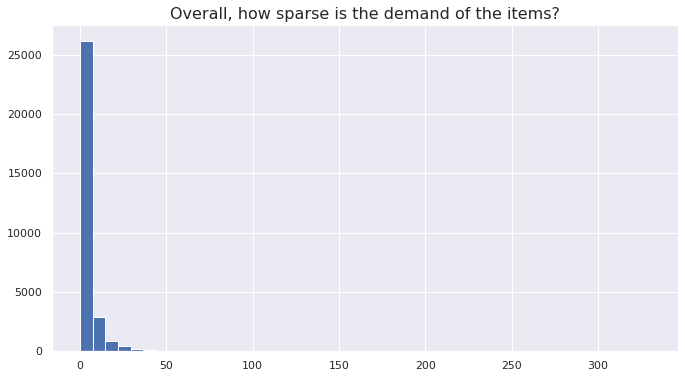

In [0]:
#You can SEE how sparse this data set is... how most of the demand is around 0
melt2['sales'].hist(bins=45, figsize=(10,6))
plt.title ("Overall, how sparse is the demand of the items?", fontsize= 16)

# Random Forest
* Before jumping straight into a Light Grandient Boost Model, lets first try a random forest.
* Random Forests are fantastic at being a great first model (out of the box) to throw at the problem.
* It has the ability to model multiple datatypes.
>* Later, I can play around with one-hot encoding on the categorical columns to see if that improves the score
* Parameters I will focus on= max number of trees, max depth of trees


In [0]:
#dropping columns that the Random forest cannot compute
melt2.reset_index(inplace= True)
melt2.drop(columns= 'date', inplace=True)
melt2.set_index('item', inplace=True)
melt2.head()

,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear,is_month_start,is_month_end,last_wk_sales,last_wk_diff,log_sales,2wks_sales,2wks_diff,3wks_sales,3wks_diff,4wks_sales,4wks_diff,5wks_sales,5wks_diff,6wks_sales,6wks_diff,7wks_sales,7wks_diff,8wks_sales,8wks_diff,new_years,christmas,thanksgiving,farm2table,memorial_day,back_to_school
item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10218B,0.0,19,292,4,10,2018,42,0,0,0.00,0.00,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.5,-4.5,8.5,-8.5,False,False,False,False,False,False
10219,7.0,19,292,4,10,2018,42,0,0,10.50,-3.50,2.079442,9.5,-2.5,13.00,-6.00,7.0,0.0,6.5,0.5,20.0,-13.0,6.0,1.0,13.7,-6.7,False,False,False,False,False,False
10221,0.0,19,292,4,10,2018,42,0,0,1.00,-1.00,0.000000,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False
10230,8.0,19,292,4,10,2018,42,0,0,4.25,3.75,2.197225,14.0,-6.0,6.25,1.75,10.0,-2.0,6.0,2.0,10.0,-2.0,9.0,-1.0,5.0,3.0,False,False,False,False,False,False
10236,2.0,19,292,4,10,2018,42,0,0,7.00,-5.00,1.098612,3.0,-1.0,2.00,0.00,3.0,-1.0,4.0,-2.0,0.0,2.0,1.0,1.0,0.0,2.0,False,False,False,False,False,False


In [0]:
mean_error = []

for week in range(last_week-8, last_week): #setting up 8 weeks train/test set
  
    train = melt2[melt2['weekofyear'] < week]
    val = melt2[melt2['weekofyear'] == week]
    
    xtr, xts = train.drop(['sales'], axis=1), val.drop(['sales'], axis=1)
    ytr, yts = train['sales'].values, val['sales'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, ytr)
    
    p = mdl.predict(xts)
    
    error = rmse(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
    
print('Mean Error = %.5f' % np.mean(mean_error))

Week 26 - Error 0.64600
Week 27 - Error 0.38400
Week 28 - Error 0.19400
Week 29 - Error 0.30700
Week 30 - Error 0.10500
Week 31 - Error 0.17300
Week 32 - Error 0.07700
Week 33 - Error 0.42700
Mean Error = 0.28913


#### Is my model overfitting?


* If the training error is low and the validation error is much higher, your model is overfitting.
*   YES, empirically trees can definitely over fit.
*   One way to prevent overfitting is to trim the trees and indicate a max number of leaves. I will create a grid search, and then visualize the testing versus the training data and see at which values overfitting is occuring.


In [0]:
#Is my model over fitting here? Possibly! Let's take a look at how max_depth affects overfitting
#We'll take the last week in the data set as the testing set and train on the other weeks

train = melt2[melt2['weekofyear'] < 33] #NOTE: our training set gets smaller the further out the weeks are
test = melt2[melt2['weekofyear'] == 33]
    
x_train, x_test = train.drop(['sales'], axis=1), test.drop(['sales'], axis=1)
y_train, y_test = train['sales'].values, test['sales'].values


max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
  rf = RandomForestRegressor(n_estimators=1000, max_depth=max_depth, n_jobs=-1)
  rf.fit(x_train, y_train)
  train_p = rf.predict(x_train)
  train_err = rmse(y_train, train_p)
  train_results.append(train_err)
  
  test_p = rf.predict(x_test)
  test_err = rmse(y_test, test_p)
  test_results.append(test_err)

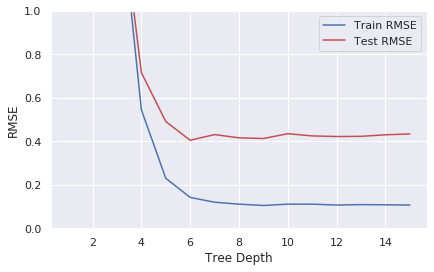

In [0]:
#Plot Tree Depth of Testing Versus Training
plt.plot(max_depths, train_results, color= 'b', label='Train RMSE')
plt.plot(max_depths, test_results, color= 'r', label='Test RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.ylim(0,1)
plt.xlabel('Tree Depth')
plt.show()

#### INSIGHTS
*GREAT! Tree depth of 5 seems to be a good trade-off between a lower RMSE and being able to genralize into the future. Although, all these values seem to be doing fairly well and not over fitting too badly.*

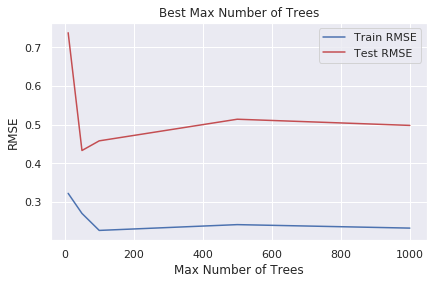

In [0]:
#Let's do the same thing for the max number of trees, and see what the optimal balance of lower RMSE without overfitting

train = melt2[melt2['weekofyear'] < 33] #NOTE: our training set gets smaller the further out the weeks are
test = melt2[melt2['weekofyear'] == 33]
    
x_train, x_test = train.drop(['sales'], axis=1), test.drop(['sales'], axis=1)
y_train, y_test = train['sales'].values, test['sales'].values


num_trees = [10, 50, 100, 500, 1000]
train_results = []
test_results = []

for num in num_trees:
  rf = RandomForestRegressor(n_estimators=num, max_depth= 5, n_jobs=-1)
  rf.fit(x_train, y_train)
  train_p = rf.predict(x_train)
  train_err = rmse(y_train, train_p)
  train_results.append(train_err)
  
  test_p = rf.predict(x_test)
  test_err = rmse(y_test, test_p)
  test_results.append(test_err)

#Plot Tree Depth of Testing Versus Training
plt.plot(num_trees, train_results, color= 'b', label='Train RMSE')
plt.plot(num_trees, test_results, color= 'r', label='Test RMSE')
plt.legend()
plt.title("Best Max Number of Trees")
plt.ylabel('RMSE')
plt.xlabel('Max Number of Trees')
plt.show()



#### INSIGHTS


*   Hookay, between 10, 50, 100, 500, 1000 which number is the best?
*   1000 seems the be the optimal max number of trees which also helps with computing power



## Trees are crappy at Forecasting Increasing Trends...
* Why? 
>* Because when you create a tree based model, your making a tree *given* the information you have. Your tree model can only see within the bounds of past data, and make predictions based on that.
* Well why are we using a tree?There are ways to get around this hinderance:
>1. Take away the trend or seasonality of your data BEFORE you train the tree, and the re-introduce it back once you've created your prediction. (This goes back to the concept of stationarity)
>>* Take the log of your data,and then reverse (this helps with seasonality, co-variance, and outliers)
>>* Take the difference of your data, and then reverse (this helps with trend)
>2. Find features that are not based on time such as holidays or weather
* For this problem I will take the log of the data and then transform it back. I may also look into taking the difference and then the log to account for potential future seasonality and trend.
* Let's try taking the log!

In [0]:
#Officially training and testing the last weeks model with the best tree parameters
  
#def model(df, week):

%%time 
train = melt2[melt2['weekofyear'] < 34]
test = melt2[melt2['weekofyear'] == 34]
    
x_train, x_test = train.drop(['sales'], axis=1), test.drop(['sales'], axis=1)
y_train, y_test = train['sales'].values, test['sales'].values
    
mdl = RandomForestRegressor(n_estimators=1000, max_depth= 5, n_jobs=-1, random_state=0)
mdl.fit(x_train, np.log1p(y_train))
    
p_train = np.expm1(mdl.predict(x_train))
train_error = rmse(y_train, p_train) 
print (f'Train Error= {train_error}')

pred_vs_actual_train = pd.DataFrame({
    'actual': y_train,
    'predicted': p_train,
    'error_rf': (((p_train-y_train)/y_train*100)),
    'rmse': train_error,
})
pred_vs_actual_train= pred_vs_actual_train.round(3)
        
p = np.expm1(mdl.predict(x_test))
error = rmse(y_test, p)
print (f'Test Error= {error}')

pred_vs_actual_test = pd.DataFrame({
    'actual': y_test,
    'predicted': p,
    'error_rf': (((p-y_test)/y_test*100)),
    'rmse': error,
})
pred_vs_actual_test= pred_vs_actual_test.round(3)

Train Error= 1.934
Test Error= 2.894
CPU times: user 1min 37s, sys: 340 ms, total: 1min 38s
Wall time: 50.3 s


In [0]:
#Test
test.reset_index(inplace=True)
results_test = pd.concat([test, pred_vs_actual_test], axis=1, sort=False)
results_test= results_test[['item', 'weekofyear', 'actual', 'last_wk_sales','predicted', 'error_rf', 'rmse']]
results_test['error_n']= ((results_test.last_wk_sales.values- results_test.actual.values)/results_test.actual.values)*100

print (results_test)


         item  weekofyear  actual  ...  error_rf   rmse     error_n
0      10218B          34     0.0  ...       NaN  2.894         NaN
1       10219          34     6.5  ...    -6.376  2.894   23.076923
2       10221          34     3.0  ...     0.654  2.894 -100.000000
3       10230          34     9.0  ...    -5.452  2.894    0.000000
4       10236          34     0.0  ...       NaN  2.894         NaN
..        ...         ...     ...  ...       ...    ...         ...
495    70046C          34    22.0  ...     5.344  2.894  -36.363636
496    70114A          34   192.0  ...    22.098  2.894   10.416667
497     90107          34     3.0  ...     0.654  2.894  100.000000
498  CV70191W          34     0.0  ...       NaN  2.894         NaN
499   CV70192          34     1.0  ...     0.021  2.894 -100.000000

[500 rows x 8 columns]


How much better did the Random Forest perform than the Naive Model?
Random Forest model increased performance by:  62.50 % 



Text(0.5, 1.0, 'How well did the Random Forest Do?')

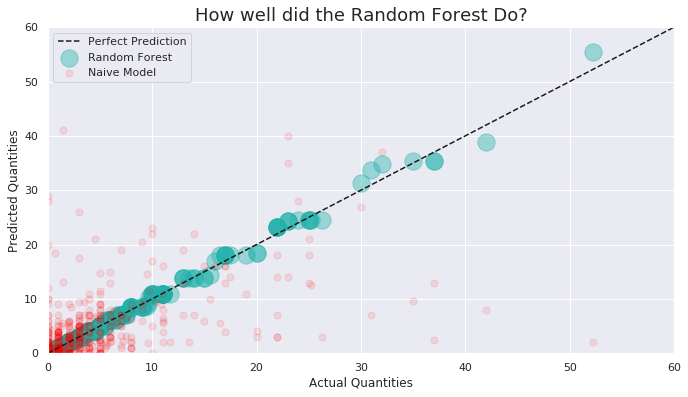

In [0]:
#Actual values versus predicted values
print ("How much better did the Random Forest perform than the Naive Model?")
print(f'Random Forest model increased performance by: {abs((error-naive_error)/naive_error) * 100: .2f} % \n')
plt.figure(figsize=(10,6))
plt.scatter(results_test.actual, results_test.predicted, s=300, color='lightseagreen', alpha= .4, label= "Random Forest")
plt.scatter(results_test.actual, results_test.last_wk_sales, s=50, color='red', alpha= .1, label= "Naive Model")

x = np.linspace(0,60,60)
y = x
plt.plot(x, y, 'k', linestyle='--', label= "Perfect Prediction")
plt.legend()
plt.ylim(0,60)
plt.xlim(0,60)
plt.xlabel('Actual Quantities')
plt.ylabel('Predicted Quantities')
plt.title("How well did the Random Forest Do?", fontsize= 18)


#### Insights


*   Runs fairly slow, I can adjust number of trees to improve this and see how that affects the performance
*   62% increase in performance!



Text(0.5, 1.0, 'Most Important Features for Random Forest')

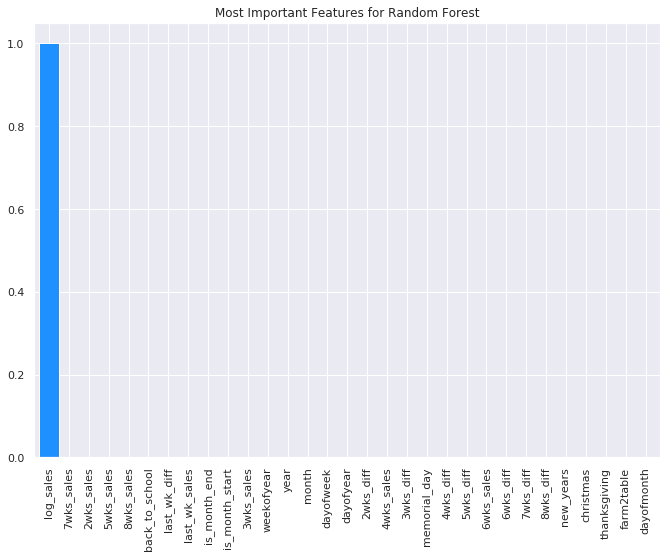

In [0]:
feature_importances = pd.Series(mdl.feature_importances_, index=x_train.columns)
feature_importances.sort_values(inplace=True, ascending=False)
feature_importances[:50].plot.bar( color="dodgerblue", figsize= (10,8), width= 1)
plt.title("Most Important Features for Random Forest")

# Light Gradiant Boost Model
* Cutting edge with gradient boosting!
* Wins lots of Kaggle Competitions!
* Seems to be super efficient

In [0]:
#LGBM WITH logged data

mean_error = []

for week in range(last_week-8, last_week): #setting up 8 weeks train/test set
  
    train = melt2[melt2['weekofyear'] < week]
    val = melt2[melt2['weekofyear'] == week]
    
    xtr, xts = train.drop(['sales'], axis=1), val.drop(['sales'], axis=1)
    ytr, yts = train['sales'].values, val['sales'].values
    
    mdl = LGBMRegressor(n_estimators=1000, learning_rate=0.01)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmse(yts, p)
    print('Week %d - Error %.5f' % (week, error))
    mean_error.append(error)
    


Week 26 - Error 0.40700
Week 27 - Error 0.67300
Week 28 - Error 0.86800
Week 29 - Error 0.50800
Week 30 - Error 0.40700
Week 31 - Error 0.29000
Week 32 - Error 0.56600
Week 33 - Error 0.03500


In [0]:
print ("How Well Did the Models Do?\n")

print (f"Mean Error of Naive Model = {naive_error}")
print ("Mean Error of Random Forest= 0.289")
print(f"Mean Error of a LGBM = {np.mean(mean_error):.3f}" )

How Well Did the Models Do?

Mean Error of Naive Model = 7.71675
Mean Error of Random Forest= 0.289
Mean Error of a LGBM = 0.469


In [0]:
#parameter hyper tuning

# params = {
#     'boosting_type': 'gbdt',  # np.random.choice(['dart', 'gbdt']),
#     'objective': 'binary',
#     'metric': ['binary_logloss', 'auc'], 
    
#     'learning_rate': 0.35,
    
#     'num_leaves': np.random.randint(64, 128),
#     'max_depth': np.random.randint(6, 12),
#     'min_data_in_leaf': int(2 ** (np.random.rand()*3.5 + 9)),
    
#     'feature_fraction': np.random.rand()*0.35+0.65,
#     'bagging_fraction': np.random.rand()*0.35+0.65,
#     'bagging_freq': 1,
    
#     'lambda_l1': 10 ** (np.random.rand() * 4),
#     'lambda_l2': 10 ** (np.random.rand() * 3 + 2),
#     'min_gain_to_split': 0.0,
#     'min_sum_hessian_in_leaf': 0.1,
    
#     'num_threads': 16,
#     'verbose': 0,
#     'is_training_metric': 'True'
# }

In [0]:
# Hypertune Parameters of LGBM Model

from sklearn.model_selection import GridSearchCV
estimator = LGBMRegressor()

param_grid = {
    'learning_rate': [0.01, 0.05, .1, .2, .3],
    'n_estimators': [20, 50, 100, 500, 1000],
    'num_leaves':[3,4,5,6,7,8,9,10,15,20,25,30]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(x_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.05, 'n_estimators': 1000, 'num_leaves': 4}


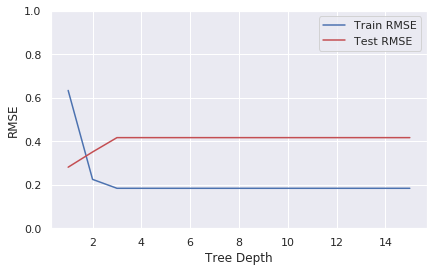

CPU times: user 1min 8s, sys: 505 ms, total: 1min 9s
Wall time: 36.1 s


In [0]:
#Is my model over fitting here? Possibly! Let's take a look at how max_depth affects overfitting
#We'll take the last week in the data set as the testing set and train on the other weeks

%%time 
train = melt2[melt2['weekofyear'] < 33] #NOTE: our training set gets smaller the further out the weeks are
test = melt2[melt2['weekofyear'] == 33]
    
x_train, x_test = train.drop(['sales'], axis=1), test.drop(['sales'], axis=1)
y_train, y_test = train['sales'].values, test['sales'].values


max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
train_results = []
test_results = []

for max_depth in max_depths:
  lgb = LGBMRegressor(n_estimators=1000, num_leaves=4, max_depth=max_depth, learning_rate=0.05)
  lgb.fit(x_train, y_train)
  train_p = lgb.predict(x_train)
  train_err = rmse(y_train, train_p)
  train_results.append(train_err)
  
  test_p = lgb.predict(x_test)
  test_err = rmse(y_test, test_p)
  test_results.append(test_err)

#Plot Tree Depth of Testing Versus Training
plt.plot(max_depths, train_results, color= 'b', label='Train RMSE')
plt.plot(max_depths, test_results, color= 'r', label='Test RMSE')
plt.legend()
plt.ylabel('RMSE')
plt.ylim(0,1)
plt.xlabel('Tree Depth')
plt.show()

#### INSIGHTS


*   Best parameters found by grid search are: {'learning_rate': 0.05, 'n_estimators': 1000, 'num_leaves': 4}
*   To prevent overfitting max_depth is set to 2 to prevent overfitting



In [0]:
#Officially training and testing the last weeks model with the best tree parameters
  
#def model(df, week):

%%time 
train = melt2[melt2['weekofyear'] < 34]
test = melt2[melt2['weekofyear'] == 34]
    
x_train, x_test = train.drop(['sales'], axis=1), test.drop(['sales'], axis=1)
y_train, y_test = train['sales'].values, test['sales'].values
    
lgb = LGBMRegressor(n_estimators=1000, num_leaves=4, max_depth= 2, learning_rate=0.05)
lgb.fit(x_train, np.log1p(y_train))
    
p_train = np.expm1(lgb.predict(x_train))
train_error = rmse(y_train, p_train) 
print (f'Train Error= {train_error}')

pred_vs_actual_train = pd.DataFrame({
    'actual': y_train,
    'predicted': p_train,
    'error_rf': (((p_train-y_train)/y_train*100)),
    'rmse': train_error,
})
pred_vs_actual_train= pred_vs_actual_train.round(3)
        
p = np.expm1(lgb.predict(x_test))
error = rmse(y_test, p)
print (f'Test Error= {error}')

pred_vs_actual_test = pd.DataFrame({
    'actual': y_test,
    'predicted': p,
    'error_rf': (((p-y_test)/y_test*100)),
    'rmse': error,
})
pred_vs_actual_test= pred_vs_actual_test.round(3)

Train Error= 0.218
Test Error= 0.521
CPU times: user 4.55 s, sys: 29 ms, total: 4.58 s
Wall time: 2.41 s


How much better did the LightGBM perform than the Naive Model?
LightGBM increased performance by:  93.25 % 



Text(0.5, 1.0, 'How well did the LightGradientBoost Model Do?')

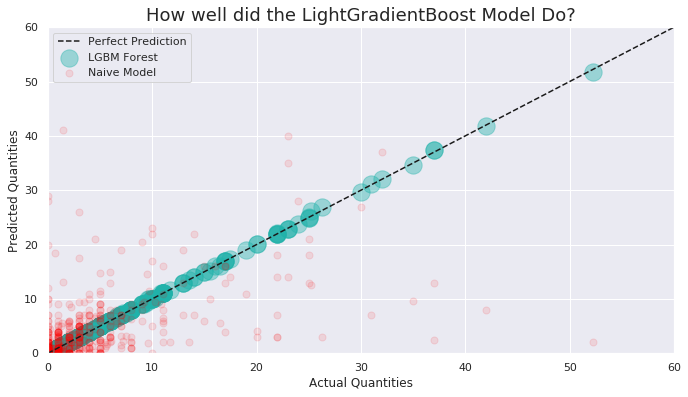

In [0]:
#Test
test.reset_index(inplace=True)
results_test = pd.concat([test, pred_vs_actual_test], axis=1, sort=False)
results_test= results_test[['item', 'weekofyear', 'actual', 'last_wk_sales','predicted', 'error_rf', 'rmse']]
results_test['error_n']= ((results_test.last_wk_sales.values- results_test.actual.values)/results_test.actual.values)*100

#Actual values versus predicted values
print ("How much better did the LightGBM perform than the Naive Model?")
print(f'LightGBM increased performance by: {abs((error-naive_error)/naive_error) * 100: .2f} % \n')
plt.figure(figsize=(10,6))
plt.scatter(results_test.actual, results_test.predicted, s=300, color='lightseagreen', alpha= .4, label= "LGBM Forest")
plt.scatter(results_test.actual, results_test.last_wk_sales, s=50, color='red', alpha= .1, label= "Naive Model")

x = np.linspace(0,60,60)
y = x
plt.plot(x, y, 'k', linestyle='--', label= "Perfect Prediction")
plt.legend()
plt.ylim(0,60)
plt.xlim(0,60)
plt.xlabel('Actual Quantities')
plt.ylabel('Predicted Quantities')
plt.title("How well did the LightGradientBoost Model Do?", fontsize= 18)


#### Which features are the most important?

Text(0.5, 1.0, 'Most Important Features for LightGB MODEL')

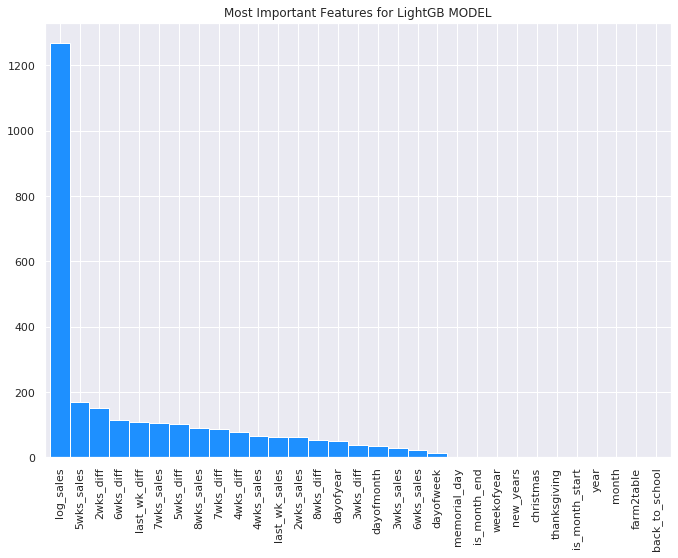

In [0]:
# feature importances
feature_importances = pd.Series(lgb.feature_importances_, index=x_train.columns)
feature_importances.sort_values(inplace=True, ascending=False)
feature_importances[:50].plot.bar( color="dodgerblue", figsize= (10,8), width= 1)
plt.title("Most Important Features for LightGB MODEL")

# Questions

1. Is LGBM overfitting?
2.   Can I drop features that don't make a difference?
3.   Which models should I use?
4.  HOW TO TRANSLATE WHAT I HAVE TO ACTUAL WEEKLY PREDICTIONS????????????
    >* so i would have to create a data of x_variables somehow and then that would be my prediction for the y variables!
    >* how to create a data frame of x_variables?
5. HOW TO IMPLEMENT THIS MODEL IN THE REAL WORLD???
6.Can I implement every Sunday and Thursday?
7.best way to calculate accuracy for model?? percent change from naive RMSE to new RMSE????



# NOTES HOW TO REDUCE OVERFITTING

Tuning for overfitting

In addition to the parameters mentioned above the following parameters can be used to control overfitting:

* max_bin: the maximum numbers bins that feature values are bucketed in. A smaller max_bin reduces overfitting.
* min_child_weight: the minimum sum hessian for a leaf. In conjuction with min_child_samples, larger values reduce overfitting.
* bagging_fraction and bagging_freq: enables bagging (subsampling) of the training data. Both values need to be set for bagging to be used. The frequency controls how often (iteration) bagging is used. Smaller fractions and frequencies reduce overfitting.
* feature_fraction: controls the subsampling of features used for training (as opposed to subsampling the actual training data in the case of bagging). Smaller fractions reduce overfitting.
* lambda_l1 and lambda_l2: controls L1 and L2 regularization.